Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [41]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [42]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader2 = unicodecsv.DictReader(f)
    daily_engagement = list(reader2)

with open('project_submissions.csv', 'rb') as f:
    reader3 = unicodecsv.DictReader(f)
    project_submissions = list(reader3)
    
print(daily_engagement[0])
print(project_submissions[0])

# solution
# def read_csv(filename):
#    with open(filename, 'rb') as f:
#        reader = unicodecsv.DictReader(f)
#        return list(reader)

#enrollments = read_csv('enrollments.csv')
#daily_engagement = read_csv('daily_engagement.csv')
#project_submissions = read_csv('project_submissions.csv')


{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [43]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [44]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [45]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [46]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def total_rows(l):
    return len(l) 

def unique_stud(l):
    new_l = []
    for l in l:
        new_l.append(l['account_key'])
    return len(set(new_l)) # converting list to set finds unique elements in a  list

def unique_stud_2(l):
    new_l = []
    for l in l:
        new_l.append(l['acct'])
    return len(set(new_l)) # converting list to set finds unique elements in a  list

print(total_rows(enrollments))
print(total_rows(project_submissions))
print(total_rows(daily_engagement))

print(unique_stud(enrollments))
print(unique_stud(project_submissions))
print(unique_stud_2(daily_engagement))

#solution
#len(enrollments)

#unique_enrolled_students = set()
#for enrollment in enrollments:
#    unique_enrolled_students.add(enrollment['account_key'])
#len(unique_enrolled_students)

1640
3642
136240
1302
743
1237


## Problems in the Data

In [47]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
daily_engagement_2 = daily_engagement
for engagement in daily_engagement_2:
    engagement['account_key'] = engagement.pop('acct') # don't understand why this changes daily_engagement

#daily_engagement_2[0]

In [48]:
daily_engagement[0]['account_key']

u'0'

## Missing Engagement Records

In [49]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
new_l2 = []
for engagement in daily_engagement:
    new_l2.append(engagement['account_key'])

for enrollment in enrollments:
    if (enrollment['account_key'] not in new_l2):
        print(enrollment)
        break
new_l3 = []    
for enrollment in enrollments:
        new_l3.append(enrollment['account_key'])

        
s2 = list(set(new_l2))
s3 = sorted([int(x) for x in s2])
#print(s3)
#s4 = sorted([int(y) for y in list(set(new_l3))])
#print(s4)

    
#print(range(0,unique_stud(enrollments)))
a = 0
for i in range(0,1306):
    if (i not in s3):
        #print(i)
        for enrollment in enrollments:
            if int(enrollment['account_key']) == i:
                print(i)
                print(enrollment)
                a = a+1
print(a)
    


{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
654
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}
654
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}
654
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 3, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 3, 0, 0), u'days_to_cancel': 0}
664
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datet

## Checking for More Problem Records

In [50]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

a = 0
for enrollment in enrollments:
    if (enrollment['account_key'] not in new_l2):
        if enrollment['join_date'] != enrollment['cancel_date']:
            print(enrollment)
            a = a+1
print(a)
   


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [51]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [52]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [53]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [54]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students ={}
for enrollment in non_udacity_enrollments:
    if (enrollment['days_to_cancel'] > 7 or enrollment['is_canceled'] != True):
        if (enrollment['account_key'] not in paid_students or enrollment['join_date'] > paid_students[enrollment['account_key']]):
            paid_students[enrollment['account_key']] = enrollment['join_date']
       

len(paid_students)
paid_students['0']    



datetime.datetime(2015, 1, 9, 0, 0)

## Getting Data from First Week

In [55]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [56]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

#for students in paid_students:
paid_engagement_in_first_week = []
for engagement in daily_engagement:
    if (engagement['account_key'] in paid_students.keys() and within_one_week(paid_students[engagement['account_key']], engagement['utc_date'])):
        paid_engagement_in_first_week.append(engagement)
len(paid_engagement_in_first_week)
paid_engagement_in_first_week

[{'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 11.6793745,
  u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 37.2848873333,
  u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)},
 {'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 53.6337463333,
  u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)},
 {'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 33.4892696667,
  u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)},
 {'account_key': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 64.7796776667,
  u'utc_date': datetime.datetime(2015,

## Exploring Student Engagement

In [57]:
#Create a dictionary of engagement grouped by student.
#The keys are account keys, and the values are lists of engagement records.
#allows you to specify dictionary type
from collections import defaultdict
def group_items(records, key_name):
    by_account = defaultdict(list)
    for record in records:
        account_key = record[key_name]
        by_account[account_key].append(record)
    return by_account
engagement_by_account = group_items(paid_engagement_in_first_week,'account_key')

In [58]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def dictforstudent(engagement_account, str):
    total_by_account = {}
    for account_key, engagement_for_student in engagement_account.items(): #by looping over items, you get both key and value
        total = 0
        for engagement_record in engagement_for_student:
            total += engagement_record[str]
        total_by_account[account_key] = total
    return total_by_account

total_minutes_by_account = dictforstudent(engagement_by_account, 'total_minutes_visited')

In [59]:
import numpy as np

# Summarize the data about minutes spent in the classroom
def somestats(total_by_account):
    total = total_by_account.values()
    print 'Mean:', np.mean(total)
    print 'Standard deviation:', np.std(total)
    print 'Minimum:', np.min(total)
    print 'Maximum:', np.max(total)

somestats(total_minutes_by_account)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [60]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
total_minutes = total_minutes_by_account.values()
total_minutes_by_account.values()[total_minutes.index(np.max(total_minutes))]
key = total_minutes_by_account.keys()[total_minutes.index(np.max(total_minutes))]
engagement_by_account[key]
#engagement_by_account[unicode(1)]
#daily_engagement[18350]
#print(total_minutes)
#total_minutes_by_account


[{'account_key': u'163',
  u'lessons_completed': 4,
  u'num_courses_visited': 4,
  u'projects_completed': 0,
  u'total_minutes_visited': 850.519339666,
  u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)},
 {'account_key': u'163',
  u'lessons_completed': 6,
  u'num_courses_visited': 6,
  u'projects_completed': 0,
  u'total_minutes_visited': 872.633923334,
  u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)},
 {'account_key': u'163',
  u'lessons_completed': 6,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 777.018903666,
  u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)},
 {'account_key': u'163',
  u'lessons_completed': 2,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 294.568774,
  u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)},
 {'account_key': u'163',
  u'lessons_completed': 1,
  u'num_courses_visited': 3,
  u'projects_completed': 0,
  u'total_minutes_visited': 471.2139785,
  u'utc_date': datetime.dateti

## Lessons Completed in First Week

In [61]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
total_lessons_by_account = dictforstudent(engagement_by_account, 'lessons_completed')
somestats(total_lessons_by_account)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [62]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def dictforstudentvisit(engagement_account, str):
    total_by_account = {}
    for account_key, engagement_for_student in engagement_account.items(): #by looping over items, you get both key and value
        total = 0
        for engagement_record in engagement_for_student:
            if engagement_record[str] > 0:
                total += 1
        total_by_account[account_key] = total
    return total_by_account

total_visits_by_account = dictforstudentvisit(engagement_by_account, 'num_courses_visited')
somestats(total_visits_by_account)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [63]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

paid_submissions = []
for submissions in non_udacity_submissions:
    if submissions['account_key'] in paid_students.keys():
        paid_submissions.append(submissions)
    
print(len(paid_submissions))
    
paid_submissions    
    


3618


[{u'account_key': u'256',
  u'assigned_rating': u'UNGRADED',
  u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
  u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'},
 {u'account_key': u'256',
  u'assigned_rating': u'INCOMPLETE',
  u'completion_date': datetime.datetime(2015, 1, 13, 0, 0),
  u'creation_date': datetime.datetime(2015, 1, 10, 0, 0),
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'},
 {u'account_key': u'256',
  u'assigned_rating': u'PASSED',
  u'completion_date': datetime.datetime(2015, 1, 20, 0, 0),
  u'creation_date': datetime.datetime(2015, 1, 20, 0, 0),
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'},
 {u'account_key': u'434',
  u'assigned_rating': u'PASSED',
  u'completion_date': datetime.datetime(2015, 3, 13, 0, 0),
  u'creation_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'},
 {u'ac

In [64]:
#prints number of students that passed and failed

submission_by_account = group_items(paid_submissions,'account_key')


passed_by_account = defaultdict(list)
notpassed_by_account = defaultdict(list)
passing_engagement = []
nonpassing_engagement = []
for account_key, submission_for_student in submission_by_account.items(): #by looping over items, you get both key and value
    total = 0
    for submission in submission_for_student:
            if submission['lesson_key'] in subway_project_lesson_keys and (submission['assigned_rating'] == unicode('PASSED') or submission['assigned_rating'] == unicode('DISTINCTION')):
                total += 1
    if total >= 1:
        passed_by_account[account_key] = engagement_by_account[account_key]
        for engagement in paid_engagement_in_first_week:
            if engagement['account_key'] == account_key:
                passing_engagement.append(engagement)
    else:
        notpassed_by_account[account_key] = engagement_by_account[account_key]
        for engagement in paid_engagement_in_first_week:
            if engagement['account_key'] == account_key:
                nonpassing_engagement.append(engagement)

                
print(len(paid_submissions))
print(len(submission_by_account.keys())) #does not have info of all students
print(len(passed_by_account))
print(len(notpassed_by_account))

print(len(passing_engagement))
print(len(nonpassing_engagement))
print(len(paid_engagement_in_first_week))
print(len(engagement_by_account))

# paid_submissions does not have all data that engagement recods has - i think some students data is missing in paid submissions
# So need to re run to include all data

non_passing_engagement_new = []
for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] not in passed_by_account.keys():
        non_passing_engagement_new.append(engagement)
non_passing_engagement_by_account_new = group_items(non_passing_engagement_new,'account_key')
print(len(non_passing_engagement_new))
print(len(non_passing_engagement_by_account_new))

3618
731
647
84
4527
579
6919
995
2392
348


In [65]:
#their solution:
pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

#print(len(pass_subway_project))

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)
non_passing_engagement_by_account = group_items(non_passing_engagement,'account_key')
passing_engagement_by_account = group_items(passing_engagement,'account_key')
print(len(non_passing_engagement_by_account))
print(len(passing_engagement_by_account))
print(non_passing_engagement_by_account.keys())

4527
2392
348
647
[u'1269', u'1144', u'1263', u'1262', u'811', u'812', u'816', u'1253', u'1260', u'719', u'718', u'715', u'713', u'712', u'710', u'1265', u'1264', u'1060', u'1062', u'1067', u'1066', u'912', u'1087', u'1082', u'1081', u'1080', u'1121', u'1123', u'1124', u'1089', u'1088', u'1019', u'1014', u'1015', u'1011', u'1013', u'1235', u'1236', u'1231', u'900', u'901', u'906', u'905', u'909', u'1243', u'1242', u'1244', u'1247', u'1249', u'1248', u'854', u'855', u'856', u'857', u'851', u'852', u'853', u'858', u'859', u'742', u'743', u'744', u'746', u'747', u'748', u'1199', u'1198', u'1052', u'1053', u'1054', u'1055', u'1056', u'1058', u'1194', u'1278', u'1176', u'1175', u'1174', u'1173', u'1170', u'1274', u'1276', u'1178', u'1285', u'1287', u'948', u'1282', u'946', u'1289', u'940', u'941', u'689', u'687', u'686', u'682', u'1305', u'1302', u'1303', u'939', u'938', u'932', u'931', u'937', u'934', u'829', u'828', u'825', u'824', u'823', u'822', u'1177', u'709', u'704', u'705', u'706', 

## Comparing the Two Student Groups

In [66]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
total_passed_lessons_by_account = dictforstudent(passed_by_account, 'lessons_completed')
total_notpassed_lessons_by_account = dictforstudent(non_passing_engagement_by_account_new, 'lessons_completed')
total_passed_visits_by_account = dictforstudentvisit(passed_by_account, 'num_courses_visited')
total_notpassed_visits_by_account = dictforstudentvisit(non_passing_engagement_by_account_new, 'num_courses_visited')
total_passed_minutes_by_account = dictforstudent(passed_by_account, 'total_minutes_visited')
total_notpassed_minutes_by_account = dictforstudent(non_passing_engagement_by_account_new, 'total_minutes_visited')

somestats(total_passed_lessons_by_account)
somestats(total_notpassed_lessons_by_account)
somestats(total_passed_visits_by_account)
somestats(total_notpassed_visits_by_account)
somestats(total_passed_minutes_by_account)
somestats(total_notpassed_minutes_by_account)


Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


## Making Histograms

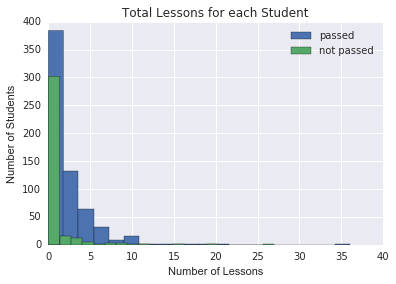

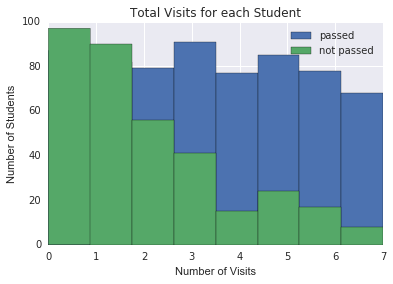

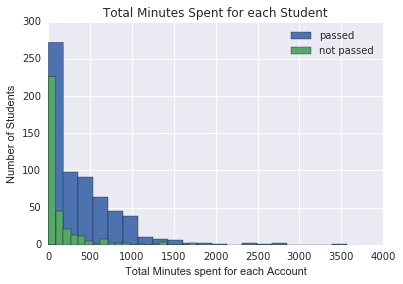

In [74]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(total_passed_lessons_by_account.values(), bins=20)
plt.hist(total_notpassed_lessons_by_account.values(),bins=20)
plt.xlabel('Number of Lessons')
plt.ylabel('Number of Students')
plt.title('Total Lessons for each Student')
plt.legend(['passed', 'not passed'],loc='upper right')
plt.show()
plt.hist(total_passed_visits_by_account.values(),bins=8)
plt.hist(total_notpassed_visits_by_account.values(), bins=8)
plt.xlabel('Number of Visits')
plt.ylabel('Number of Students')
plt.title('Total Visits for each Student')
plt.legend(['passed', 'not passed'],loc='upper right')
plt.show()

plt.hist(total_passed_minutes_by_account.values(),bins=20)
plt.hist(total_notpassed_minutes_by_account.values(),bins=20)
plt.xlabel('Total Minutes spent for each Account')
plt.ylabel('Number of Students')
plt.title('Total Minutes Spent for each Student')
plt.legend(['passed', 'not passed'],loc='upper right')



## Improving Plots and Sharing Findings

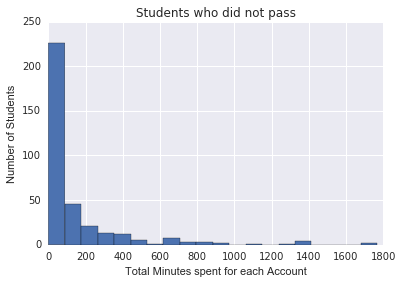

In [68]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns
%matplotlib inline #works for just 1 plot i think
plt.hist(total_notpassed_minutes_by_account.values(),bins=20)
plt.xlabel('Total Minutes spent for each Account')
plt.ylabel('Number of Students')
plt.title('Students who did not pass')
